# Pandas

1. 데이터 추출

In [1]:
import pandas as pd

In [2]:
df=pd.read_csv('data/gapminder.tsv',sep='\t')
print(df.head(),'\n')
print('Data type : ',type(df))
print('data size : ',df.shape)
print('columns : ', df.columns)

       country continent  year  lifeExp       pop   gdpPercap
0  Afghanistan      Asia  1952   28.801   8425333  779.445314
1  Afghanistan      Asia  1957   30.332   9240934  820.853030
2  Afghanistan      Asia  1962   31.997  10267083  853.100710
3  Afghanistan      Asia  1967   34.020  11537966  836.197138
4  Afghanistan      Asia  1972   36.088  13079460  739.981106 

Data type :  <class 'pandas.core.frame.DataFrame'>
data size :  (1704, 6)
columns :  Index(['country', 'continent', 'year', 'lifeExp', 'pop', 'gdpPercap'], dtype='object')


In [3]:
# 특정 열의 데이터만 추출
country_df=df['country']
print(country_df.head())

#특정 열의 이름을 전달하여 한번에 추출
subset=df[['country','continent','year']]
subset.head()

0    Afghanistan
1    Afghanistan
2    Afghanistan
3    Afghanistan
4    Afghanistan
Name: country, dtype: object


country continent  year
0  Afghanistan      Asia  1952
1  Afghanistan      Asia  1957
2  Afghanistan      Asia  1962
3  Afghanistan      Asia  1967
4  Afghanistan      Asia  1972

In [4]:
# 행 단위로 데이터 추출
# loc : 인덱스 기준, iloc : 행 번호 기준

print(df.loc[0],'\n')   # 0번째 인덱스
print(df.iloc[-1],'\n') # 마지막 행번호를 가진 것. loc[-1]은 에러
print(df.loc[0:1])      # 행의 범위를 설정하여 추출
print(df.iloc[0:1])

country      Afghanistan
continent           Asia
year                1952
lifeExp           28.801
pop              8425333
gdpPercap        779.445
Name: 0, dtype: object 

country      Zimbabwe
continent      Africa
year             2007
lifeExp        43.487
pop          12311143
gdpPercap     469.709
Name: 1703, dtype: object 

       country continent  year  lifeExp      pop   gdpPercap
0  Afghanistan      Asia  1952   28.801  8425333  779.445314
1  Afghanistan      Asia  1957   30.332  9240934  820.853030
       country continent  year  lifeExp      pop   gdpPercap
0  Afghanistan      Asia  1952   28.801  8425333  779.445314


In [5]:
#모든 행에 대해 year, pop 열을 추출

n_df=df[['year','pop']]
print(n_df.head(),'\n')

#loc 이용
nn_df=df.loc[:,['year','pop']]
print(nn_df.head(),'\n')

#iloc 이용
nnn_df=df.iloc[:,[2,4]]
print(nnn_df.head())

   year       pop
0  1952   8425333
1  1957   9240934
2  1962  10267083
3  1967  11537966
4  1972  13079460 

   year       pop
0  1952   8425333
1  1957   9240934
2  1962  10267083
3  1967  11537966
4  1972  13079460 

   year       pop
0  1952   8425333
1  1957   9240934
2  1962  10267083
3  1967  11537966
4  1972  13079460


In [6]:
# range
r=list(range(5))
print('r : ',r,'\n')
subs=df.iloc[:,r]
print(subs.head(),'\n')

r=list(range(3,6))
print('r : ',r,'\n')
subs=df.iloc[:,r]
print(subs.head(),'\n')

r=list(range(0,6,2))
print('r : ',r,'\n')
subs=df.iloc[:,r]
print(subs.head())

r :  [0, 1, 2, 3, 4] 

       country continent  year  lifeExp       pop
0  Afghanistan      Asia  1952   28.801   8425333
1  Afghanistan      Asia  1957   30.332   9240934
2  Afghanistan      Asia  1962   31.997  10267083
3  Afghanistan      Asia  1967   34.020  11537966
4  Afghanistan      Asia  1972   36.088  13079460 

r :  [3, 4, 5] 

   lifeExp       pop   gdpPercap
0   28.801   8425333  779.445314
1   30.332   9240934  820.853030
2   31.997  10267083  853.100710
3   34.020  11537966  836.197138
4   36.088  13079460  739.981106 

r :  [0, 2, 4] 

       country  year       pop
0  Afghanistan  1952   8425333
1  Afghanistan  1957   9240934
2  Afghanistan  1962  10267083
3  Afghanistan  1967  11537966
4  Afghanistan  1972  13079460


-------

2. 통계 계산

(1) 평균 mean

In [7]:
# lifeExp 열을 연도별로 그불화하여 평균 계산하기
print(df.groupby('year')['lifeExp'].mean())

# lifeExp, gdpPercap열의 평균값을 연도, 지역별로 그룹화하여 한번에 계산
print(df.groupby(['year','continent'])[['lifeExp','gdpPercap']].mean())

#nunique : 데이터 개수 세기
print(df.groupby('continent')['country'].nunique())

year
1952    49.057620
1957    51.507401
1962    53.609249
1967    55.678290
1972    57.647386
1977    59.570157
1982    61.533197
1987    63.212613
1992    64.160338
1997    65.014676
2002    65.694923
2007    67.007423
Name: lifeExp, dtype: float64
                  lifeExp     gdpPercap
year continent                         
1952 Africa     39.135500   1252.572466
     Americas   53.279840   4079.062552
     Asia       46.314394   5195.484004
     Europe     64.408500   5661.057435
     Oceania    69.255000  10298.085650
1957 Africa     41.266346   1385.236062
     Americas   55.960280   4616.043733
     Asia       49.318544   5787.732940
     Europe     66.703067   6963.012816
     Oceania    70.295000  11598.522455
1962 Africa     43.319442   1598.078825
     Americas   58.398760   4901.541870
     Asia       51.563223   5729.369625
     Europe     68.539233   8365.486814
     Oceania    71.085000  12696.452430
1967 Africa     45.334538   2050.363801
     Americas   60.410920   5

(2) 그래프 그리기

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

<AxesSubplot:xlabel='year'>

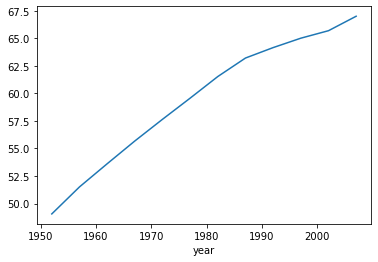

In [9]:
new_df=df.groupby('year')['lifeExp'].mean()
new_df.plot()

# 데이터 프레임 & 시리즈

In [10]:
# 시리즈 생성
s=pd.Series(['Age',26])
print(s)
d=pd.Series(['Name','John'])
print(d)
f=pd.Series(['John','26'],index=['Name','Age'])
print(f)

0    Age
1     26
dtype: object
0    Name
1    John
dtype: object
Name    John
Age       26
dtype: object


In [11]:
# 데이터프레임 생성
info=pd.DataFrame({
    'Name' : ['John','Amy'],
    'Age' : [26,30],
    'Occupation' : ['Engineer','Artist'],
    'Born' : ['1996-04-04','1992-08-12']
})
print(info)
info.index=info['Name']
print(info)

   Name  Age Occupation        Born
0  John   26   Engineer  1996-04-04
1   Amy   30     Artist  1992-08-12
      Name  Age Occupation        Born
Name                                  
John  John   26   Engineer  1996-04-04
Amy    Amy   30     Artist  1992-08-12


In [12]:
print(info.loc['John'])
print('index : ',info.index)
print('value : ',info.values)
print('keys  : ',info.keys())

Name                John
Age                   26
Occupation      Engineer
Born          1996-04-04
Name: John, dtype: object
index :  Index(['John', 'Amy'], dtype='object', name='Name')
value :  [['John' 26 'Engineer' '1996-04-04']
 ['Amy' 30 'Artist' '1992-08-12']]
keys  :  Index(['Name', 'Age', 'Occupation', 'Born'], dtype='object')


In [13]:
# 통계
ages=info['Age']
print('mean : ',ages.mean())  # 평균
print('min : ',ages.min())    # 최소
print('max : ',ages.max())    # 최대
print('std : ',ages.std())    # 표준편차

mean :  28.0
min :  26
max :  30
std :  2.8284271247461903


------

In [14]:
s=pd.read_csv('data/scientists.csv')
s

Name        Born        Died  Age          Occupation
0     Rosaline Franklin  1920-07-25  1958-04-16   37             Chemist
1        William Gosset  1876-06-13  1937-10-16   61        Statistician
2  Florence Nightingale  1820-05-12  1910-08-13   90               Nurse
3           Marie Curie  1867-11-07  1934-07-04   66             Chemist
4         Rachel Carson  1907-05-27  1964-04-14   56           Biologist
5             John Snow  1813-03-15  1858-06-16   45           Physician
6           Alan Turing  1912-06-23  1954-06-07   41  Computer Scientist
7          Johann Gauss  1777-04-30  1855-02-23   77       Mathematician

In [15]:
ages=s['Age']
print('mean',ages.mean())
print('max',ages.max())
# 평균보다 나이가 많은 사람만 추출
print([ages>ages.mean()])
print(ages[ages>ages.mean()])
print(s.loc[ages[ages>ages.mean()].index,['Name','Age']])

mean 59.125
max 90
[0    False
1     True
2     True
3     True
4    False
5    False
6    False
7     True
Name: Age, dtype: bool]
1    61
2    90
3    66
7    77
Name: Age, dtype: int64
                   Name  Age
1        William Gosset   61
2  Florence Nightingale   90
3           Marie Curie   66
7          Johann Gauss   77


In [16]:
#평균 연령보다 높은 행만 출력

print(s[s['Age']>s['Age'].mean()])

                   Name        Born        Died  Age     Occupation
1        William Gosset  1876-06-13  1937-10-16   61   Statistician
2  Florence Nightingale  1820-05-12  1910-08-13   90          Nurse
3           Marie Curie  1867-11-07  1934-07-04   66        Chemist
7          Johann Gauss  1777-04-30  1855-02-23   77  Mathematician


--------

In [17]:
# 자료형 변경
print(s['Born'].dtype,s['Died'].dtype)
#datetime으로 변경
born=pd.to_datetime(s['Born'],format='%Y-%m-%d')
print(born)
die=pd.to_datetime(s['Died'],format='%Y-%m-%d')
print(die)
# 원래 데이터 프레임에 추가
s['born_dt'],s['died_dt']=born,die
print(s.head())
#datetime끼리 계산
s['die-born']=s['died_dt']-s['born_dt']
print(s.head())

object object
0   1920-07-25
1   1876-06-13
2   1820-05-12
3   1867-11-07
4   1907-05-27
5   1813-03-15
6   1912-06-23
7   1777-04-30
Name: Born, dtype: datetime64[ns]
0   1958-04-16
1   1937-10-16
2   1910-08-13
3   1934-07-04
4   1964-04-14
5   1858-06-16
6   1954-06-07
7   1855-02-23
Name: Died, dtype: datetime64[ns]
                   Name        Born        Died  Age    Occupation    born_dt  \
0     Rosaline Franklin  1920-07-25  1958-04-16   37       Chemist 1920-07-25   
1        William Gosset  1876-06-13  1937-10-16   61  Statistician 1876-06-13   
2  Florence Nightingale  1820-05-12  1910-08-13   90         Nurse 1820-05-12   
3           Marie Curie  1867-11-07  1934-07-04   66       Chemist 1867-11-07   
4         Rachel Carson  1907-05-27  1964-04-14   56     Biologist 1907-05-27   

     died_dt  
0 1958-04-16  
1 1937-10-16  
2 1910-08-13  
3 1934-07-04  
4 1964-04-14  
                   Name        Born        Died  Age    Occupation    born_dt  \
0     Rosaline Frank

In [18]:
# 데이터 섞기
import random
print(s['Age'])

random.seed(0)
random.shuffle(s['Age'])
print(s['Age'])

0    37
1    61
2    90
3    66
4    56
5    45
6    41
7    77
Name: Age, dtype: int64
0    56
1    61
2    45
3    90
4    37
5    66
6    77
7    41
Name: Age, dtype: int64


/Users/cho-eunji/opt/anaconda3/lib/python3.8/random.py:307: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x[i], x[j] = x[j], x[i]


In [19]:
#열 삭제
deled_s=s.drop(['Age'],axis=1)
deled_s

Name        Born        Died          Occupation  \
0     Rosaline Franklin  1920-07-25  1958-04-16             Chemist   
1        William Gosset  1876-06-13  1937-10-16        Statistician   
2  Florence Nightingale  1820-05-12  1910-08-13               Nurse   
3           Marie Curie  1867-11-07  1934-07-04             Chemist   
4         Rachel Carson  1907-05-27  1964-04-14           Biologist   
5             John Snow  1813-03-15  1858-06-16           Physician   
6           Alan Turing  1912-06-23  1954-06-07  Computer Scientist   
7          Johann Gauss  1777-04-30  1855-02-23       Mathematician   

     born_dt    died_dt   die-born  
0 1920-07-25 1958-04-16 13779 days  
1 1876-06-13 1937-10-16 22404 days  
2 1820-05-12 1910-08-13 32964 days  
3 1867-11-07 1934-07-04 24345 days  
4 1907-05-27 1964-04-14 20777 days  
5 1813-03-15 1858-06-16 16529 days  
6 1912-06-23 1954-06-07 15324 days  
7 1777-04-30 1855-02-23 28422 days

In [20]:
# 데이터 저장 pickle
names=s['Name']
names.to_pickle('./out.pickle')
load_s=pd.read_pickle('./out.pickle')
load_s

0       Rosaline Franklin
1          William Gosset
2    Florence Nightingale
3             Marie Curie
4           Rachel Carson
5               John Snow
6             Alan Turing
7            Johann Gauss
Name: Name, dtype: object

In [21]:
#csv,tsv도 가능